<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Actividad 4: Aprendizaje No supervizado PCA
    
___

<h1> Nombre: </h1>
<hr>   

Considere el dataset "iris.csv" que contiene contiene las medidas de 150 flores que pertenecen a 3 especies diferentes:

- Iris-setosa
- Iris-versicolor
- Iris-virginica

La actividad consiste en realizar lo siguiente:

> Cargar los datos y eliminar la variable 'especie'.

> Estandrizar los datos.

> Obtener los obtener los valores propios y vectores propios a partir de la matriz de covarianza (forma manual)..

> Seleccionar los valores propios correspondientes a las componentes principales de tal forma que se obtenga arriba del 90% de información.

> Proyectar el dataset original sobre el nuevo espacio con dimensión < 4.

> Graficar las muestras en el nuevo espacio de dimensión < 4.

In [9]:
import pandas as pd
df = pd.read_csv('../Data/iris.data', names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])
df

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



<div class="alert alert-danger" style="margin: 10px"><strong>NOTA:</strong> Todas las figuras deben de estar comentadas o descritas.</div>


In [10]:
#Eliminar la columna
df = df.drop(['especie'], axis=1)

In [11]:
df

,lng sepalo,anch sepalo,lng petalo,anch petalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)

In [15]:
df_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [16]:
import numpy as np

In [17]:
# Calcular la matriz de covarianza
data_cov = np.cov(df_std.transpose())

In [18]:
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [19]:
# Obtener los valores propios y vectores propios(componentes principales)
w,v = np.linalg.eig(data_cov)


In [20]:
w

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [21]:
v

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [23]:
ratio = w/w.sum()
ratio

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, '% de información')

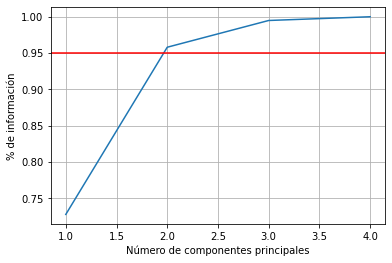

In [33]:
plt.plot(np.arange(1,len(ratio)+1),np.cumsum(ratio))
plt.grid()
plt.axhline(y=0.95,color='r', linestyle='-')
plt.xlabel('Número de componentes principales')
plt.ylabel('% de información')

In [36]:
# Crear la matriz de transformación:
M_trans = v[:,:2]
M_trans 

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

$$data_{new} = data_{std}*M_{trans}$$

$$data_{new}*M_{trans}^{-1} = data_{std}*M_{trans}*M_{trans}^{-1} $$

$$data_{new}*M_{trans}^{-1} = data_{std} $$

$$data_{new}*M_{trans}^{-1} = (data - medias)/varian $$

$$data_{new}*M_{trans}^{-1}*varian + medias = data$$

In [34]:
# Realizar la transformación data_new_STD = data_std*M_trans